# <center>TP 2 Computer Vision</center>

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tools

from ipywidgets import interact, fixed

# 1. Image thresholding/binarization
## 1.1. Histograms

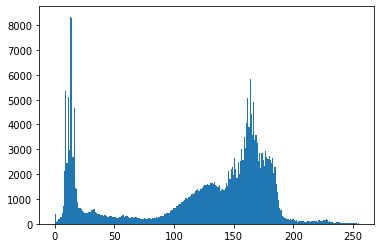

In [3]:
# Load a grayscale image as grayscale and uint between 0 and 255
cameraman_grey = cv2.imread( 'Images/cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Numpy histograms
hist_np, bins = np.histogram( cameraman_grey.ravel(),256,[0,256])

# OpenCV histograms
hist_cv = cv2.calcHist( [cameraman_grey],[0],None,[256],[0,256])

# Plot an histogram with matplotlib
%matplotlib inline
plt.hist(cameraman_grey.ravel(), bins=256, range=(0,255))
plt.show()

## 1.2. Image Thresholding with python

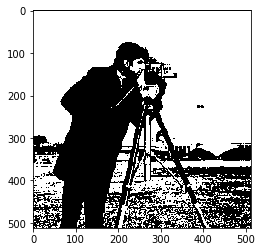

In [4]:
%matplotlib inline

cameraman_threshold = cameraman_grey > 127

plt.imshow(cameraman_threshold, cmap="gray")
plt.show()

## 1.3. Image Thresholding with OpenCV

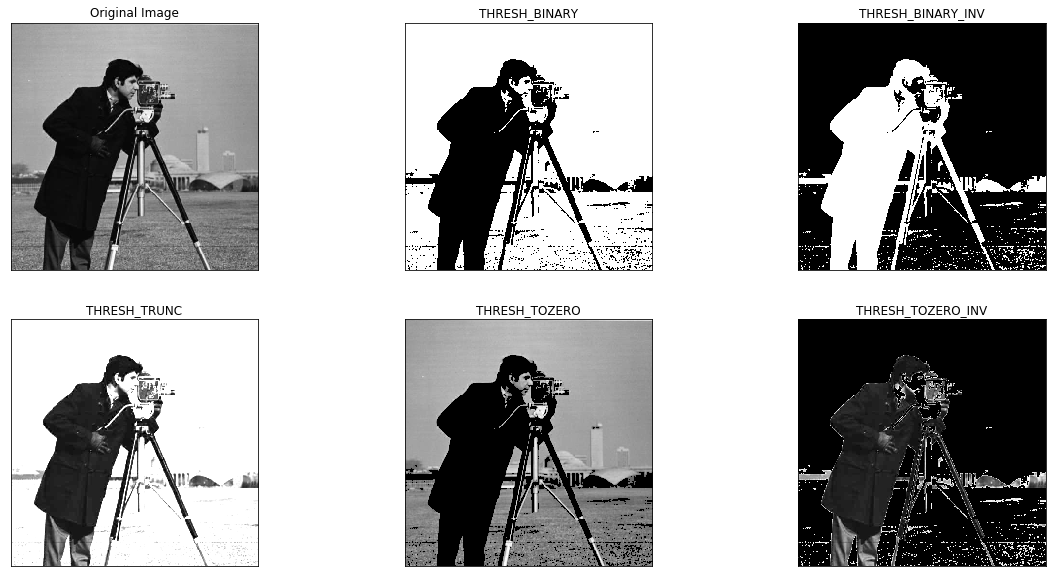

In [5]:
threshVal = 100

ret, thresh1 = cv2.threshold( cameraman_grey, threshVal, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold( cameraman_grey, threshVal, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold( cameraman_grey, threshVal, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold( cameraman_grey, threshVal, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold( cameraman_grey, threshVal, 255, cv2.THRESH_TOZERO_INV)

tools.multiPlot( 2, 3, ( cameraman_grey, thresh1, thresh2, thresh3, thresh4, thresh5),
                       ( 'Original Image', 'THRESH_BINARY', 'THRESH_BINARY_INV',
                        'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV'),
                        cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray))


# 2. Automatic binarization
## 2.1 Otsu's algorithm

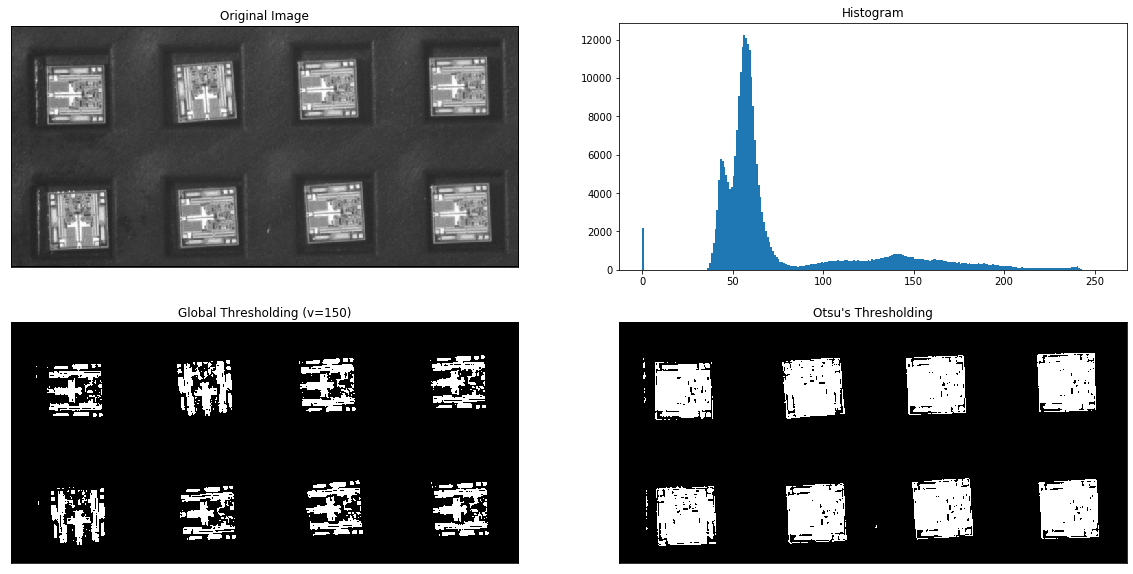

In [6]:
# Load a grayscale image as grayscale
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# global thresholding
ret1,th1 = cv2.threshold( img, 150, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold( img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms

tools.multiPlot( 2, 2, ( img, img, th1, th2),
                       ( 'Original Image', 'Histogram', 'Global Thresholding (v=150)', "Otsu's Thresholding"),
                        cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray),
                        dispType_tuple=( 'image', 'histogram', 'image', 'image'))

## 2.2. Otsu's binarization by parts

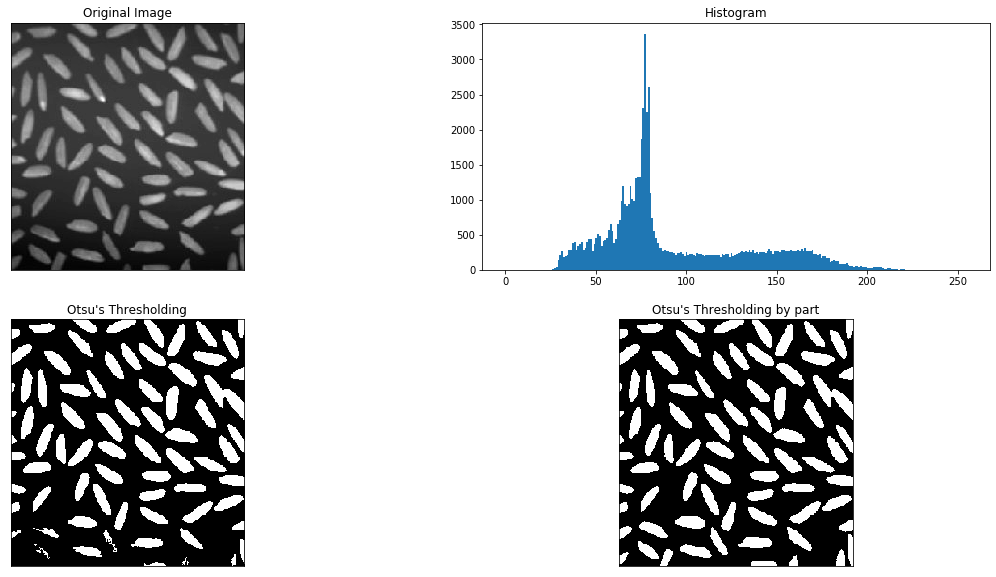

In [7]:
# Load a grayscale image as grayscale
img = cv2.imread( 'Images/rice.jpg', cv2.IMREAD_GRAYSCALE)

# Otsu's thresholding
ret1,th1 = cv2.threshold( img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding by parts
ret21,th21 = cv2.threshold( img[:53,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

ret22,th22 = cv2.threshold( img[53:106,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret23,th23 = cv2.threshold( img[106:159,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret24,th24 = cv2.threshold( img[159:212,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret25,th25 = cv2.threshold( img[212:,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Combine parts
th2 = np.concatenate( ( th21, th22, th23, th24, th25), axis=0)

# plot all the images and their histograms
tools.multiPlot( 2, 2, ( img, img, th1, th2),
                       ( 'Original Image', 'Histogram', "Otsu's Thresholding", "Otsu's Thresholding by part"),
                        cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray),
                        dispType_tuple=('image', 'histogram', 'image', 'image'))

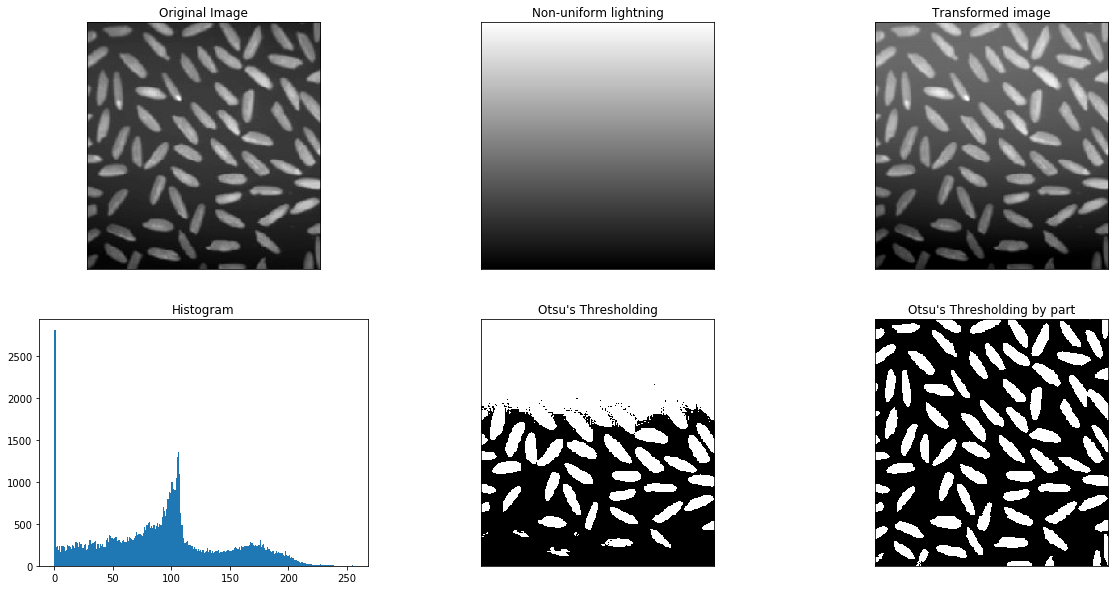

In [8]:
# Load a grayscale image as grayscale
img = cv2.imread( 'Images/rice.jpg', cv2.IMREAD_GRAYSCALE)

light_gradient = np.arange( start=132, stop=-133, step=-1) / 3
non_uniform_lightning = ( np.reshape( light_gradient, ( 265, 1))) * np.ones( ( 1, 250), dtype=int)

img_nu = tools.saturate_cast_uint8( img + non_uniform_lightning)

# Otsu's thresholding
ret1,th1 = cv2.threshold( img_nu, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding by parts
ret21,th21 = cv2.threshold( img_nu[:53,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret22,th22 = cv2.threshold( img_nu[53:106,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret23,th23 = cv2.threshold( img_nu[106:159,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret24,th24 = cv2.threshold( img_nu[159:212,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret25,th25 = cv2.threshold( img_nu[212:,:], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Combine parts
th2 = np.concatenate( ( th21, th22, th23, th24, th25), axis=0)

# plot all the images and their histograms
tools.multiPlot( 2, 3, ( img, non_uniform_lightning, img_nu, img_nu, th1, th2),
                       ( 'Original Image', 'Non-uniform lightning', 'Transformed image',
                         'Histogram', "Otsu's Thresholding", "Otsu's Thresholding by part"),
                        cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray, cm.gray, cm.gray),
                        dispType_tuple=('image', 'image', 'image', 'histogram', 'image', 'image'))

# 3. Bilateral filtering

The goal of this filter is to reduce the noise while keeping the edges sharp. The function is defined as:

$I^{filtered}(x)=\frac{1}{W_p(x)}\sum_{x_i\in\Omega(x)}{I(x_i)f(||I(x_i)-I(x)||)g(||x_i-x||)}$

$W_P(x) = \sum_{x_i\in\Omega(x)}{f(||I(x_i)-I(x)||)g(||x_i-x||)}$

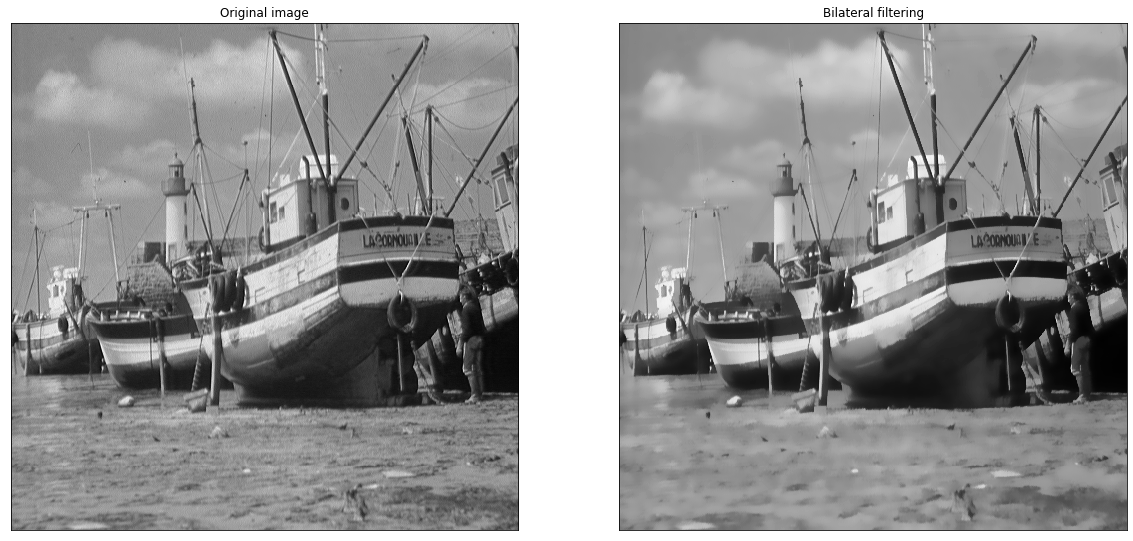

<function __main__.update(omega=10, sigma_color=20, sigma_space=50)>

In [9]:
img = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)

def update(omega=10, sigma_color=20, sigma_space=50):
    img_bilat = cv2.bilateralFilter( img, omega, sigma_color, sigma_space)

    tools.multiPlot( 1, 2, ( img, img_bilat), ( 'Original image', 'Bilateral filtering'),
                       cmap_tuple=( cm.gray, cm.gray))

interact(update, omega = [1, 5, 10, 20, 30] , sigma_color = (10, 250, 10), sigma_space=(10,250,10))

In [10]:
#img = cv2.imread( 'Images/boat.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)

def update(omega=10, sigma_color=20, sigma_space=50):
    img_bilat = cv2.bilateralFilter( img, omega, sigma_color, sigma_space)

    tools.multiPlot( 1, 2, ( img[600:900,300:700], img_bilat[600:900,300:700]), ( 'Original image', 'Bilateral filtering'),
                       cmap_tuple=( cm.gray, cm.gray))

interact(update, omega = [1, 5, 10, 20, 30] , sigma_color = (10, 250, 10), sigma_space=(10,250,10))

error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/bilateral_filter.dispatch.cpp:166: error: (-215:Assertion failed) (src.type() == CV_8UC1 || src.type() == CV_8UC3) && src.data != dst.data in function 'bilateralFilter_8u'


<function __main__.update(omega=10, sigma_color=20, sigma_space=50)>

# 4. Edge detection (2)
## 4.1. Automatic Canny with Otsu's algorithm

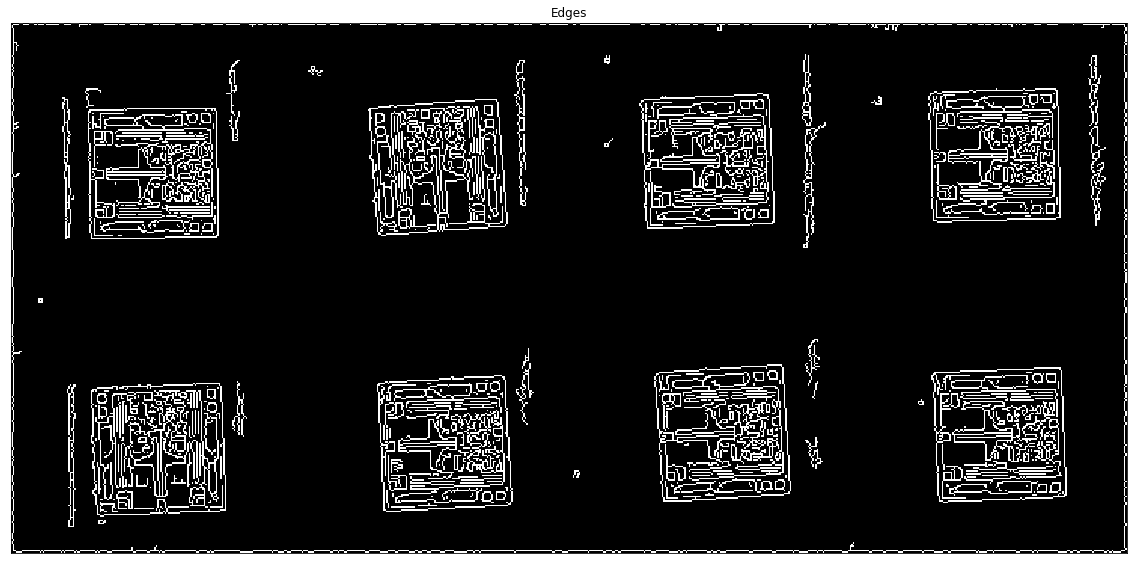

In [11]:
img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/1_HQ00020.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/image.000078.png', cv2.IMREAD_GRAYSCALE)

hiThreshold, _ = cv2.threshold( img, thresh=0, maxval=255, type=( cv2.THRESH_BINARY + cv2.THRESH_OTSU))

fLoHiRatio = 0.3
edges = cv2.Canny( img, fLoHiRatio * hiThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

## 4.2. Automatic Canny with median

In [12]:
#img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/1_HQ00020.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/image.000078.png', cv2.IMREAD_GRAYSCALE)

# compute the median of the single channel pixel intensities
med = np.median( img)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( img, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

## 4.3. Prefiltering and scaling

In [13]:
#img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/Road.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/1_HQ00020.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/image.000078.png', cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 11
imgFilt = cv2.GaussianBlur( img, ( iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]
   
# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

error: OpenCV(4.1.1) /io/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


## 4.4. Edge location

In [ ]:
# Extract the coordinates of the edge points from the 'edges' image
width = imgReduc.shape[1]
height = imgReduc.shape[0]
grid = np.mgrid[ 0:height, 0:width]
X = grid[1][edges > 0]
Y = grid[0][edges > 0]

# Recreate the 'edges2' image from the edge points location
edges2 = np.zeros_like( imgReduc)
edges2[ Y, X] = 255

# Compute the gradient vector and orientation at the edge points 
imgGradX = cv2.Sobel( imgReduc, cv2.CV_32F, 1, 0, ksize=3)
imgGradY = cv2.Sobel( imgReduc, cv2.CV_32F, 0, 1, ksize=3)
gradX = imgGradX[edges > 0]
gradY = imgGradY[edges > 0]
gradTheta = np.arctan2( gradY, gradX)

# Compute the orientation of the vectors from the origin to the line of support (tangent) of the edges
lineTheta = np.where( X * gradX + Y * gradY < 0, gradTheta + np.pi, gradTheta)
lineTheta = np.where( lineTheta < 0.0, lineTheta + 2.0 * np.pi, lineTheta)

# plot all the images
tools.multiPlot( 1, 1, ( edges2,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))